In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('diabetes_risk_prediction_dataset.csv')
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
data.replace({'Yes':1, 'No':0}, inplace= True)
data.head()

C:\Users\zazz\AppData\Local\Temp\ipykernel_26188\2646625062.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Yes':1, 'No':0}, inplace= True)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [4]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [5]:
x = data.drop('class', axis=1)
y = data['class']

In [7]:
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [8]:
y

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

In [11]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
model.score(x_train, y_train)

0.9399038461538461

In [13]:
model.score(x_test, y_test)

0.9423076923076923

In [14]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
model_scaled = LogisticRegression()
model_scaled.fit(x_train, y_train)

LogisticRegression()

In [16]:
print(model_scaled.score(x_train, y_train))
print(model_scaled.score(x_test, y_test))

0.9423076923076923
0.9423076923076923


In [17]:
y_pred = model_scaled.predict(x_test)

In [18]:
pd.DataFrame({"True values":y_test, "Predicted values": y_pred})

,True values,Predicted values
109,Positive,Positive
372,Negative,Negative
489,Negative,Negative
401,Negative,Negative
308,Negative,Negative
...,...,...
37,Positive,Positive
72,Positive,Positive
302,Positive,Positive
231,Negative,Negative


In [19]:
accuracy_score(y_test,y_pred)

0.9423076923076923

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  1],
       [ 5, 59]])

Text(50.722222222222214, 0.5, 'True values')

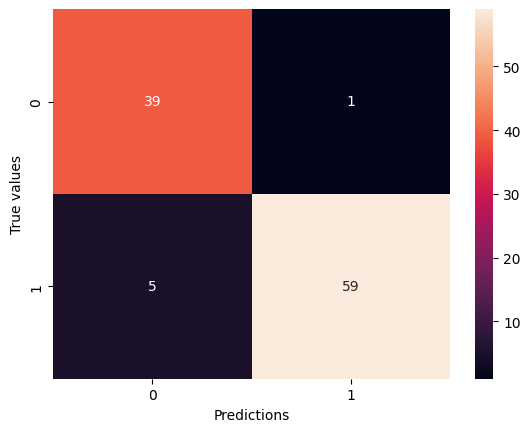

In [21]:
sns.heatmap(cm, annot= True)
plt.xlabel("Predictions")
plt.ylabel("True values")

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.89      0.97      0.93        40
    Positive       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104

